# Import libraries and dataset

Download dataset from https://www.ilzetzki.com/
(paper: Exchange Arrangements Entering the 21st Century: Which Anchor Will Hold?)

In [ ]:
# pip install geopandas matplotlib

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from google.colab import files
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving Anchor_monthly_1946-2019.xlsx to Anchor_monthly_1946-2019.xlsx


In [ ]:
file_name = 'Anchor_monthly_1946-2019.xlsx'
xls = pd.ExcelFile(file_name)

# Cleaning dataset

In [ ]:
# Manually specify the years
year_1 = "2019M12"
year_2 = "1999M1"

# Load the "Master" sheet into a DataFrame
df_master = xls.parse('Master')

# Transpose the DataFrame
df_transposed = df_master.T

# Set the first row as the new column labels
df_transposed.columns = df_transposed.iloc[0]

# Drop the first row, which is now redundant as column labels
df_transposed = df_transposed[1:]

# Select only the "ISO3 Code", "2019M12", and "1999M1" columns
columns_to_keep = ['ISO3 Code', year_1, year_2]
df_selected_columns = df_transposed[columns_to_keep]

# Rename the "ISO3 Code" column to "ISO3"
df_selected_columns = df_selected_columns.rename(columns={'ISO3 Code': 'ISO3'})

# Drop rows with missing values in either "2019M12" or "1999M1" columns
df = df_selected_columns.dropna(subset=[year_1, year_2])

# Create a new column "dollar_change" based on the conditions for USD
conditions_usd = [
    (df[year_1] == "USD") & (df[year_2] == "USD"),          # If both years are "USD"
    (df[year_1] != "USD") & (df[year_2] == "USD"),          # If year_1 is not "USD" and year_2 is "USD"
    (df[year_1] == "USD") & (df[year_2] != "USD"),          # If year_1 is "USD" and year_2 is not "USD"
    (df[year_1] != "USD") & (df[year_2] != "USD")           # Otherwise
]
choices_usd = [1, 2, 3, 4]

df['dollar_change'] = np.select(conditions_usd, choices_usd, default=np.nan)

# Create a new column "eurp_change" based on the conditions for EUR
conditions_eur = [
    (df[year_1] == "EUR") & (df[year_2] == "EUR"),          # If both years are "EUR"
    (df[year_1] != "EUR") & (df[year_2] == "EUR"),          # If year_1 is not "EUR" and year_2 is "EUR"
    (df[year_1] == "EUR") & (df[year_2] != "EUR"),          # If year_1 is "EUR" and year_2 is not "EUR"
    (df[year_1] != "EUR") & (df[year_2] != "EUR")           # Otherwise
]
choices_eur = [1, 2, 3, 4]

df['eurp_change'] = np.select(conditions_eur, choices_eur, default=np.nan)

# Display the resulting DataFrame
df.head(20)


Currency anchors,ISO3,2019M12,1999M1,dollar_change,eurp_change
Unnamed: 1,AFG,USD,INR,3.0,4.0
Unnamed: 2,ALB,EUR,USD,2.0,3.0
Unnamed: 3,DZA,EUR,EUR,4.0,1.0
Unnamed: 4,AND,EUR,EUR,4.0,1.0
Unnamed: 5,AGO,n.a.,Freely_falling,4.0,4.0
Unnamed: 6,AIA,USD,USD,1.0,4.0
Unnamed: 7,ATG,USD,USD,1.0,4.0
Unnamed: 8,ARG,USD,USD,1.0,4.0
Unnamed: 9,ARM,USD,USD,1.0,4.0
Unnamed: 10,ABW,USD,USD,1.0,4.0


# Merging with world map dataset

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge DataFrame with world map
merged_data = pd.merge(world, df, left_on='iso_a3', right_on='ISO3', how='left', suffixes=('_world', '_df')).fillna({'dollar_change': 4, 'eurp_change': 4})

# Update values for 'GRL' and 'ATA' if needed
merged_data.loc[merged_data['iso_a3'] == 'GRL', ['dollar_change', 'eurp_change']] = 4
merged_data.loc[merged_data['iso_a3'] == 'ATA', ['dollar_change', 'eurp_change']] = 4

# Drop unnecessary columns
# Display the resulting DataFrame
merged_data.head()

<ipython-input-5-0a67fc104047>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ISO3,2019M12,1999M1,dollar_change,eurp_change
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,USD-AUD,AUD,4.0,4.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,USD,USD,1.0,4.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,4.0,4.0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,CAD,USD,2.0,4.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,USD,USD,1.0,4.0


# Plots

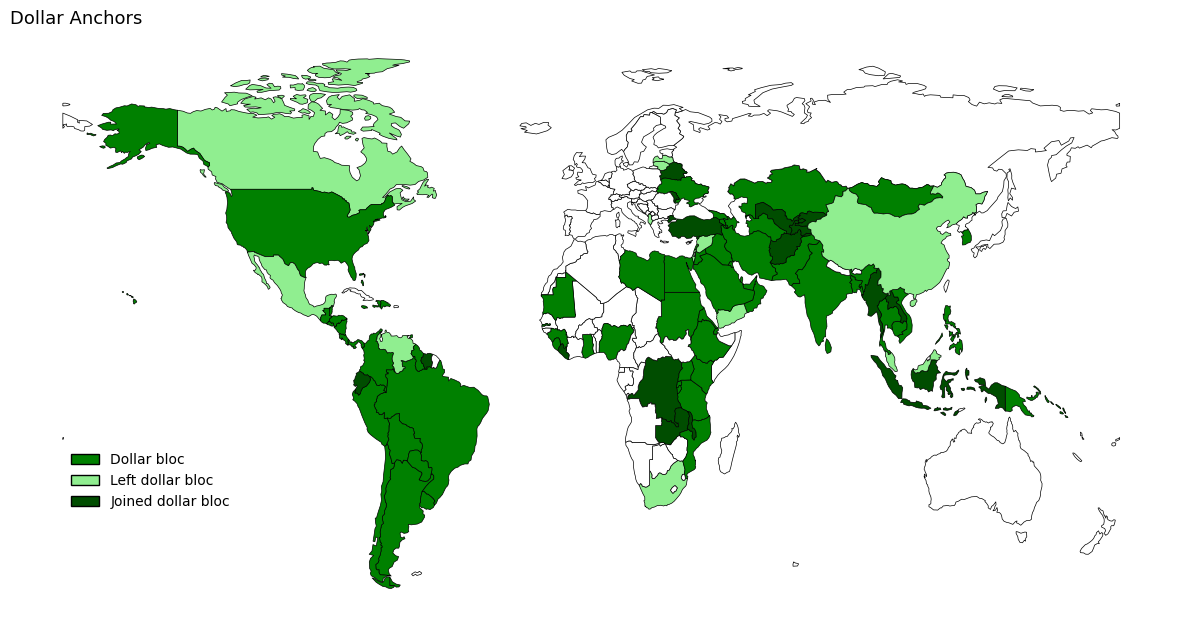

In [ ]:
import matplotlib.patches as mpatches  # Importing necessary module

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Define a custom colormap for dollar change categories
colors = ['green', 'lightgreen', '#004d00', 'white']  # Adjusted color order
cmap = plt.cm.colors.ListedColormap(colors)

# Filter out 'GRL' and 'ATA' areas and plot using the custom colormap
filtered_data = merged_data[~merged_data['iso_a3'].isin(['GRL', 'ATA'])]
filtered_data.plot(column='dollar_change', categorical=True, cmap=cmap, linewidth=0.5, ax=ax, edgecolor='black', legend=True)  # Changed edgecolor to black

#year_prefix = year[:4]

# Adjust the title alignment to the left
ax.set_title('Dollar Anchors', fontsize=13, loc='left')

# Adjust the aspect ratio of the map
ax.set_aspect(1.3)

ax.set_axis_off()

# Manually set legend labels and handles
legend_labels = ['Dollar bloc', 'Left dollar bloc', 'Joined dollar bloc']
legend_handles = [mpatches.Patch(facecolor='green', edgecolor='black'),
                  mpatches.Patch(facecolor='lightgreen', edgecolor='black'),
                  mpatches.Patch(facecolor='#004d00', edgecolor='black')]

# Create legend without a box
legend = ax.legend(legend_handles, legend_labels, title='', bbox_to_anchor=(0.2, 0.3), frameon=False)

plt.show()


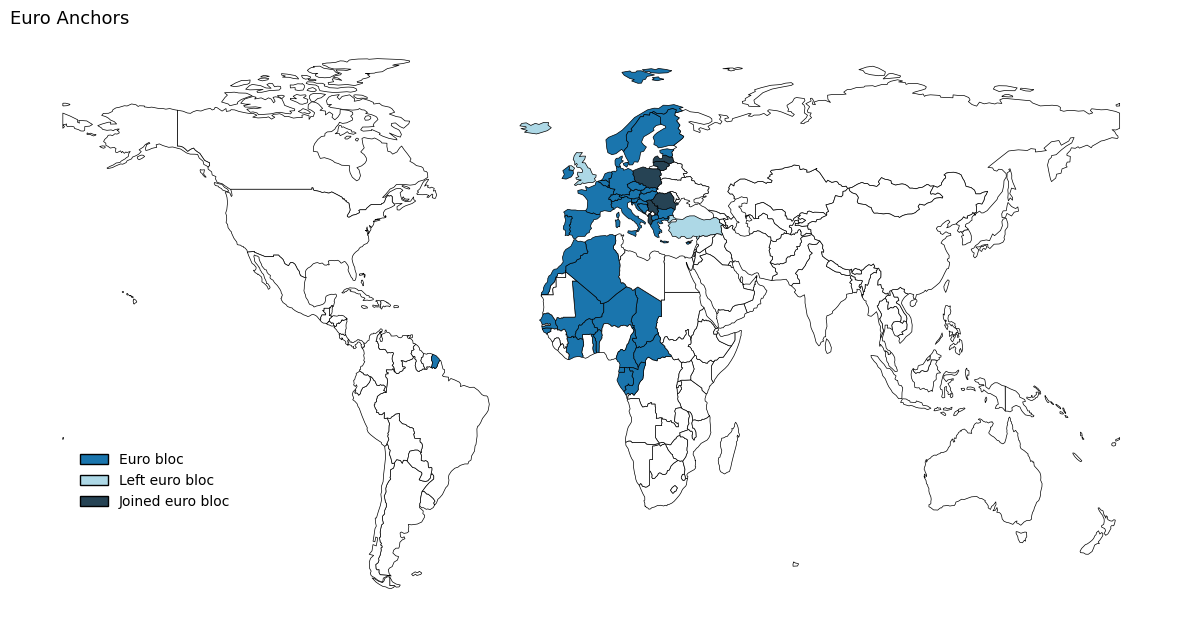

In [ ]:
import matplotlib.patches as mpatches  # Importing necessary module

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Define a custom colormap for euro change categories
colors = ['#1a75ad', 'lightblue', '#264354', 'white']  # Adjusted color order for eurp_change
cmap = plt.cm.colors.ListedColormap(colors)

# Filter out 'GRL' and 'ATA' areas and plot using the custom colormap
filtered_data = merged_data[~merged_data['iso_a3'].isin(['GRL', 'ATA'])]
filtered_data.plot(column='eurp_change', categorical=True, cmap=cmap, linewidth=0.5, ax=ax, edgecolor='black', legend=True)  # Changed edgecolor to black

#year_prefix = year[:4]

# Adjust the title alignment to the left
ax.set_title('Euro Anchors', fontsize=13, loc='left')

# Adjust the aspect ratio of the map
ax.set_aspect(1.3)

ax.set_axis_off()

# Manually set legend labels and handles
legend_labels = ['Euro bloc', 'Left euro bloc', 'Joined euro bloc']
legend_handles = [mpatches.Patch(facecolor='#1a75ad', edgecolor='black'),
                  mpatches.Patch(facecolor='lightblue', edgecolor='black'),
                  mpatches.Patch(facecolor='#264354', edgecolor='black')]

# Create legend without a box
legend = ax.legend(legend_handles, legend_labels, title='', bbox_to_anchor=(0.2, 0.3), frameon=False)

plt.show()


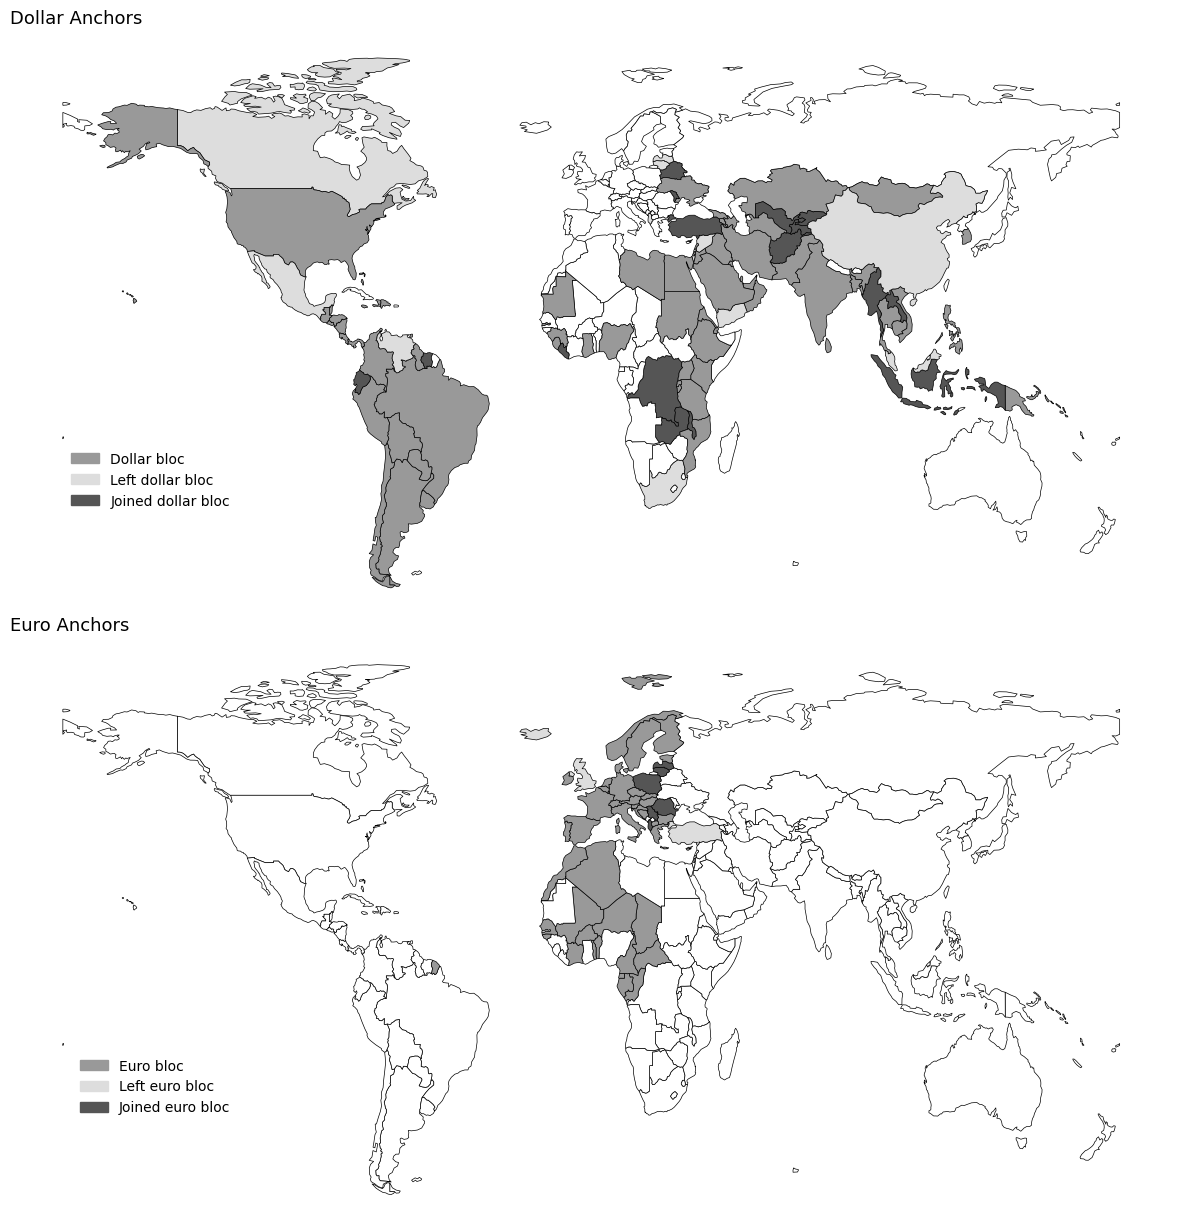

In [ ]:
import matplotlib.patches as mpatches  # Importing necessary module

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

# Plot for dollar anchors
# Define a custom colormap for dollar change categories
colors_dollar = ['#999999', '#dddddd', '#555555', 'white']  # Adjusted color order for dollar_change
cmap_dollar = plt.cm.colors.ListedColormap(colors_dollar)

# Filter out 'GRL' and 'ATA' areas and plot using the custom colormap
filtered_data_dollar = merged_data[~merged_data['iso_a3'].isin(['GRL', 'ATA'])]
filtered_data_dollar.plot(column='dollar_change', categorical=True, cmap=cmap_dollar, linewidth=0.5, ax=ax1, edgecolor='black', legend=True)  # Changed edgecolor to black

# Manually set legend labels and handles for dollar anchors
legend_labels_dollar = ['Dollar bloc', 'Left dollar bloc', 'Joined dollar bloc']
legend_handles_dollar = [mpatches.Patch(facecolor='#999999', edgecolor='#999999'),
                         mpatches.Patch(facecolor='#dddddd', edgecolor='#dddddd'),
                         mpatches.Patch(facecolor='#555555', edgecolor='#555555')]

# Create legend for dollar anchors without a box
legend_dollar = ax1.legend(legend_handles_dollar, legend_labels_dollar, title='', bbox_to_anchor=(0.2, 0.3), frameon=False)

# Title for dollar anchors
ax1.set_title('Dollar Anchors', fontsize=13, loc='left')

# Aspect ratio for dollar anchors plot
ax1.set_aspect(1.3)

# Turn off the axis for dollar anchors plot
ax1.set_axis_off()

# Plot for euro anchors
# Define a custom colormap for euro change categories
colors_euro = ['#999999', '#dddddd', '#555555', 'white']  # Adjusted color order for eurp_change
cmap_euro = plt.cm.colors.ListedColormap(colors_euro)

# Filter out 'GRL' and 'ATA' areas and plot using the custom colormap
filtered_data_euro = merged_data[~merged_data['iso_a3'].isin(['GRL', 'ATA'])]
filtered_data_euro.plot(column='eurp_change', categorical=True, cmap=cmap_euro, linewidth=0.5, ax=ax2, edgecolor='black', legend=True)  # Changed edgecolor to black

# Manually set legend labels and handles for euro anchors
legend_labels_euro = ['Euro bloc', 'Left euro bloc', 'Joined euro bloc']
legend_handles_euro = [mpatches.Patch(facecolor='#999999', edgecolor='#999999'),
                         mpatches.Patch(facecolor='#dddddd', edgecolor='#dddddd'),
                         mpatches.Patch(facecolor='#555555', edgecolor='#555555')]

# Create legend for euro anchors without a box
legend_euro = ax2.legend(legend_handles_euro, legend_labels_euro, title='', bbox_to_anchor=(0.2, 0.3), frameon=False)

# Title for euro anchors
ax2.set_title('Euro Anchors', fontsize=13, loc='left')

# Aspect ratio for euro anchors plot
ax2.set_aspect(1.3)

# Turn off the axis for euro anchors plot
ax2.set_axis_off()

plt.subplots_adjust(hspace=-0.35)

#plt.savefig('anchor_currencies_2019_1999.png', dpi=500, bbox_inches='tight')
plt.show()
#files.download('anchor_currencies_2019_1999.png')


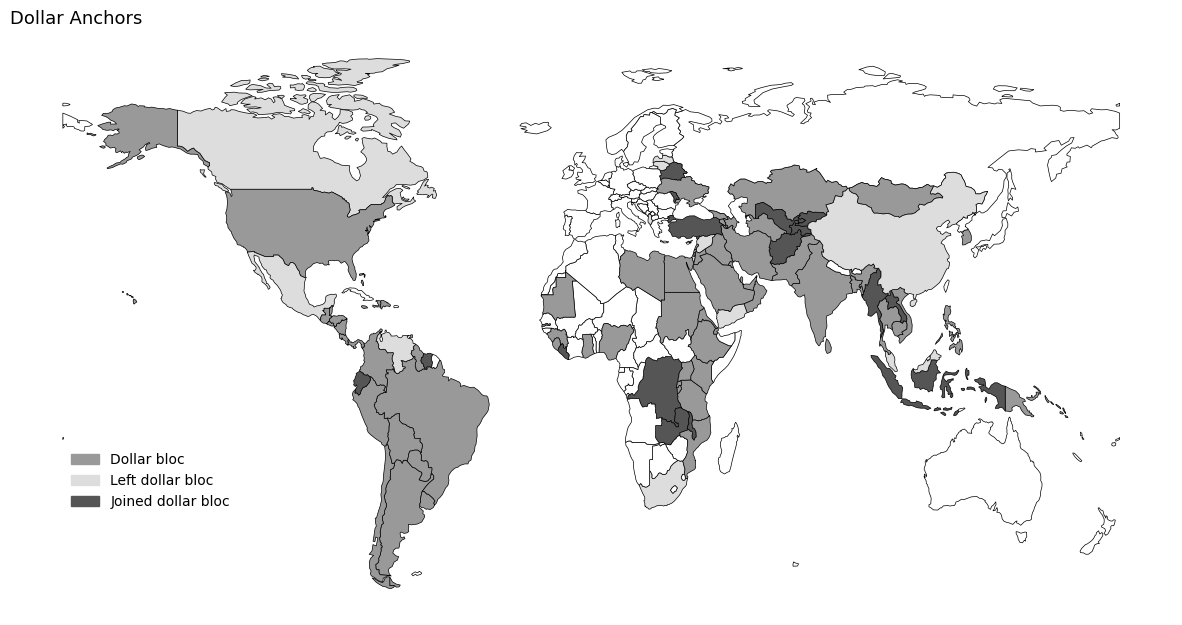

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot for dollar anchors
# Define a custom colormap for dollar change categories
colors_dollar = ['#999999', '#dddddd', '#555555', 'white']  # Adjusted color order for dollar_change
cmap_dollar = plt.cm.colors.ListedColormap(colors_dollar)

# Filter out 'GRL' and 'ATA' areas and plot using the custom colormap
filtered_data_dollar = merged_data[~merged_data['iso_a3'].isin(['GRL', 'ATA'])]
filtered_data_dollar.plot(column='dollar_change', categorical=True, cmap=cmap_dollar, linewidth=0.5, ax=ax1, edgecolor='black', legend=True)  # Changed edgecolor to black

# Manually set legend labels and handles for dollar anchors
legend_labels_dollar = ['Dollar bloc', 'Left dollar bloc', 'Joined dollar bloc']
legend_handles_dollar = [mpatches.Patch(facecolor='#999999', edgecolor='#999999'),
                         mpatches.Patch(facecolor='#dddddd', edgecolor='#dddddd'),
                         mpatches.Patch(facecolor='#555555', edgecolor='#555555')]

# Create legend for dollar anchors without a box
legend_dollar = ax1.legend(legend_handles_dollar, legend_labels_dollar, title='', bbox_to_anchor=(0.2, 0.3), frameon=False)

# Title for dollar anchors
ax1.set_title('Dollar Anchors', fontsize=13, loc='left')

# Aspect ratio for dollar anchors plot
ax1.set_aspect(1.3)

# Turn off the axis for dollar anchors plot
ax1.set_axis_off()

plt.savefig('anchor_dollar_2019_1999.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('anchor_dollar_2019_1999.png')

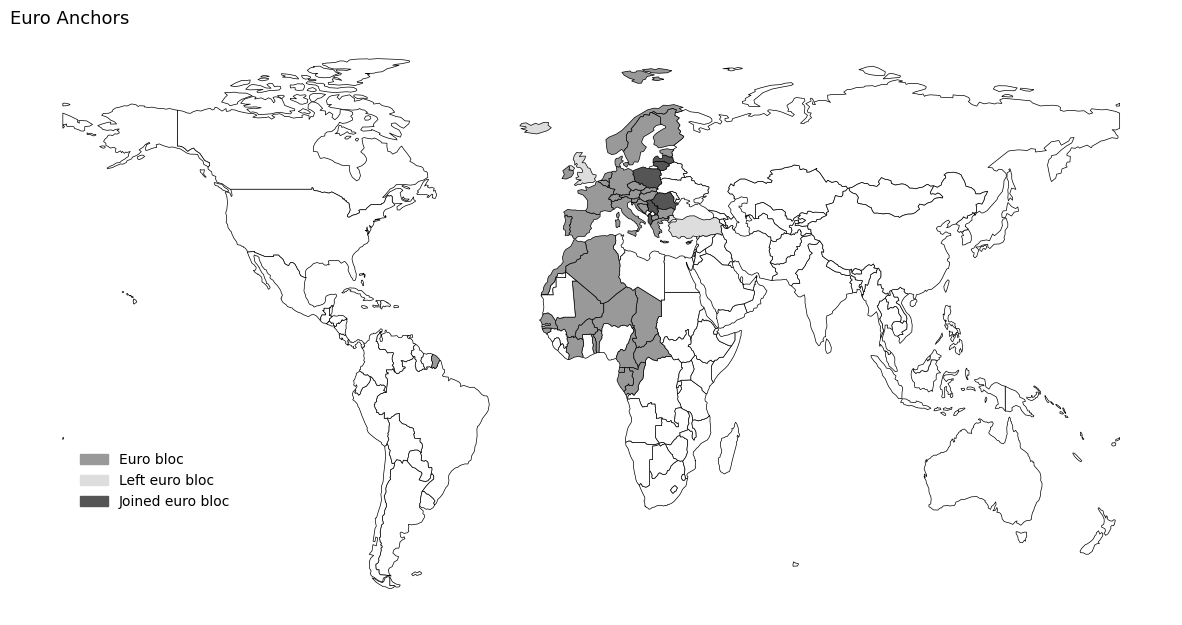

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig, ax2 = plt.subplots(figsize=(15, 10))

# Plot for euro anchors
# Define a custom colormap for euro change categories
colors_euro = ['#999999', '#dddddd', '#555555', 'white']  # Adjusted color order for eurp_change
cmap_euro = plt.cm.colors.ListedColormap(colors_euro)

# Filter out 'GRL' and 'ATA' areas and plot using the custom colormap
filtered_data_euro = merged_data[~merged_data['iso_a3'].isin(['GRL', 'ATA'])]
filtered_data_euro.plot(column='eurp_change', categorical=True, cmap=cmap_euro, linewidth=0.5, ax=ax2, edgecolor='black', legend=True)  # Changed edgecolor to black

# Manually set legend labels and handles for euro anchors
legend_labels_euro = ['Euro bloc', 'Left euro bloc', 'Joined euro bloc']
legend_handles_euro = [mpatches.Patch(facecolor='#999999', edgecolor='#999999'),
                         mpatches.Patch(facecolor='#dddddd', edgecolor='#dddddd'),
                         mpatches.Patch(facecolor='#555555', edgecolor='#555555')]

# Create legend for euro anchors without a box
legend_euro = ax2.legend(legend_handles_euro, legend_labels_euro, title='', bbox_to_anchor=(0.2, 0.3), frameon=False)

# Title for euro anchors
ax2.set_title('Euro Anchors', fontsize=13, loc='left')

# Aspect ratio for euro anchors plot
ax2.set_aspect(1.3)

# Turn off the axis for euro anchors plot
ax2.set_axis_off()

plt.savefig('anchor_euro_2019_1999.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('anchor_euro_2019_1999.png')